In [1]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import psutil

In [2]:
print("Memory Usage Before:", psutil.virtual_memory())

Memory Usage Before: svmem(total=14877257728, available=6014558208, percent=59.6, used=8862699520, free=6014558208)


In [3]:
loaded_3 = load_model('../GUI/Models/shape.h5')

In [3]:
loaded_all = load_model('./all.h5')

In [4]:
import os
import cv2
import dlib
import numpy as np

def extract_and_normalize_face(input_image, target_size=(128, 128)):
    # Initialize the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("./Utilities/shape_predictor_68_face_landmarks.dat")

    # Read the image
    img = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

    # Detect faces in the image
    faces = detector(img)

    # Process the first detected face
    if faces:
        face = faces[0]
        landmarks = predictor(img, face)

        # Draw a rectangle around the face
        cv2.rectangle(img, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

        # Extract the face region
        extracted_face = img[face.top():face.bottom(), face.left():face.right()]

        # Check if the extracted face is not empty
        if not extracted_face.size:
            return None

        # Resize the face to the target size
        resized_face = cv2.resize(extracted_face, target_size)

        # Save the resized face as 'test.jpg'
        cv2.imwrite('test.jpg', resized_face)

        # Normalize the pixel values to the range [0, 1]
        normalized_face = resized_face / 255.0

        # Expand the dimensions to match the input shape expected by the model
        normalized_face = np.expand_dims(normalized_face, axis=0)

        return normalized_face

    # If no faces are found, return None
    return None


In [5]:
import matplotlib.pyplot as plt
import cv2
def predict_and_plot(image_path, model):
    # Read the original image
    original_image = cv2.imread(image_path)

    # Preprocess the image
    preprocessed_image = extract_and_normalize_face(image_path)

    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_image)

    # Determine the predicted class based on the threshold
    predicted_class_index = np.argmax(predictions)
    predicted_class = None

    if predicted_class_index == 0:
        predicted_class = 'Oblong'
    elif predicted_class_index == 1:
        predicted_class = 'Square'
    elif predicted_class_index == 2:
        predicted_class = 'Round'
    elif predicted_class_index == 3:
        predicted_class = 'Heart'
    elif predicted_class_index == 4:
        predicted_class = 'Oval'

    # Plot the original image with the predicted class as the title
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Face Shape: {predicted_class}")
    plt.axis('off')
    plt.show()

    # Return the predictions
    return predictions,predicted_class

In [6]:
import os
from collections import Counter
def predict_folder(image_folder, model):
    predicted_classes = []

    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.JPG')):
            image_path = os.path.join(image_folder, filename)

            # Preprocess the image
            preprocessed_image = extract_and_normalize_face(image_path)

            # Skip processing if no face is detected
            if preprocessed_image is None:
                continue

            # Make predictions using the loaded model
            predictions = model.predict(preprocessed_image)

            # Determine the predicted class based on the threshold
            predicted_class_index = np.argmax(predictions)
            predicted_class = None

            if predicted_class_index == 0:
                predicted_class = 'Oblong'
            elif predicted_class_index == 1:
                predicted_class = 'Square'
            elif predicted_class_index == 2:
                predicted_class = 'Round'
            elif predicted_class_index == 3:
                predicted_class = 'Heart'
            elif predicted_class_index == 4:
                predicted_class = 'Oval'

            predicted_classes.append(predicted_class)

    # Count the frequency of each predicted class
    class_frequency = Counter(predicted_classes)

    # Return the frequency of each predicted class
    return class_frequency


In [206]:
# Test for Gender M 
image_folder = './test_examples/M/'  

# Get the frequency of predicted classes
class_frequency = predict_folder(image_folder, loaded_all)

# Print the results
for predicted_class, frequency in class_frequency.items():
    print(f"{predicted_class}: {frequency} images")

1/1 [==============================] - 0s 87ms/step
Oval: 27 images
Square: 25 images
Heart: 26 images
Oblong: 52 images
Round: 3 images


In [207]:
# Test for Gender F
image_folder = './test_examples/F/'  

# Get the frequency of predicted classes
class_frequency = predict_folder(image_folder, loaded_all)

# Print the results
for predicted_class, frequency in class_frequency.items():
    print(f"{predicted_class}: {frequency} images")

1/1 [==============================] - 0s 91ms/step
Oval: 20 images
Heart: 14 images
Square: 19 images
Oblong: 10 images
Round: 3 images


1/1 [==============================] - 0s 452ms/step


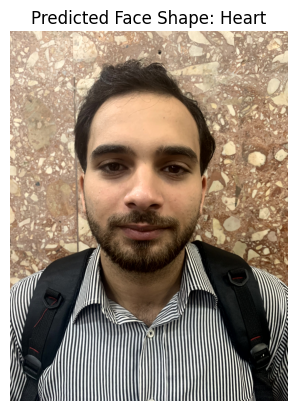

(array([[8.2438616e-03, 1.0677620e-06, 4.5275921e-09, 9.9175441e-01,
        6.4613874e-07]], dtype=float32), 'Heart')


In [8]:
image_path_to_predict = 'test_examples/M/IMG_6522.jpg' 
predictions = predict_and_plot(image_path_to_predict,loaded_3 )
print(predictions)


1/1 [==============================] - 0s 109ms/step


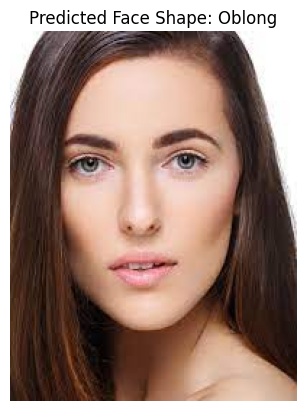

(array([[9.9885404e-01, 6.9818483e-04, 1.3955927e-06, 2.6600820e-04,
        1.8023250e-04]], dtype=float32), 'Oblong')


In [19]:
image_path_to_predict = './test_examples/download.jpg' 
predictions = predict_and_plot(image_path_to_predict,loaded_all )
print(predictions)


In [ ]:
""" from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import dlib
import os

def preprocess_image(input_image, target_size=(128, 128), expansion_factor=0.0):
    # Initialize the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("./Utilities/shape_predictor_68_face_landmarks.dat")  # Provide the correct path

    # Read the image
    img = cv2.imread(input_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)

    # Process the first detected face
    if faces:
        face = faces[0]
        landmarks = predictor(gray, face)

        # Expand the bounding box around the face
        x, y, w, h = cv2.boundingRect(np.array([(landmark.x, landmark.y) for landmark in landmarks.parts()]))
        expansion_width = int(expansion_factor * w)
        expansion_height = int(expansion_factor * h)
        x_expanded = max(0, x - expansion_width)
        y_expanded = max(0, y - expansion_height)
        w_expanded = min(img.shape[1] - x_expanded, w + 2 * expansion_width)
        h_expanded = min(img.shape[0] - y_expanded, h + 2 * expansion_height)

        # Extract the expanded face region
        extracted_face = gray[y_expanded:y_expanded + h_expanded, x_expanded:x_expanded + w_expanded]

        # Resize the face to the target size
        resized_face = cv2.resize(extracted_face, target_size)
        cv2.imwrite('test2.jpg', resized_face)

        # Normalize the pixel values to the range [0, 1]
        normalized_face = resized_face / 255.0

        # Expand the dimensions to match the input shape expected by the model
        normalized_face = np.expand_dims(normalized_face, axis=0)

        return normalized_face

    # If no faces are found, return None
    return None

 """